#Dylan Hazael Raharja, 220711894, Transformers, Klasifikasi Kematangan Rambutan, dan mengerjakan VGG-16
#Eustakius Satu Rajawali Ku, 220711648, Transformers, Klasifikasi Kematangan Rambutan, dan mengerjakan VGG-16

In [100]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt



In [101]:
base_dir = r"D:/ATMAJAYA/Semester5/PMDPL/UAS_A_11648/train_data"
img_size = 224  # VGG-16 menggunakan ukuran gambar 224x224
batch_size = 32
validation_split = 0.1

In [102]:
if os.path.exists(base_dir):
    print("Directory exists:", base_dir)
    print("Subdirectories:", os.listdir(base_dir))
else:
    raise FileNotFoundError(f"Directory not found: {base_dir}")

Directory exists: D:/ATMAJAYA/Semester5/PMDPL/UAS_A_11648/train_data
Subdirectories: ['Busuk', 'Matang', 'Mentah']


In [103]:
base_dir = r"D:/ATMAJAYA/Semester5/PMDPL/UAS_A_11648/train_data"

dataset = image_dataset_from_directory(
    base_dir, 
    seed=123, 
    image_size=(img_size, img_size), 
    batch_size=batch_size
)

Found 300 files belonging to 3 classes.


In [104]:
train_size = int(len(dataset) * 0.8)
val_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size - val_size

train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size + val_size)

In [105]:
import os

count = 0
dirs = os.listdir(r'D:\ATMAJAYA\Semester5\PMDPL\UAS_A_11648\train_data')
for dir in dirs:
    files = list(os.listdir(os.path.join(r'D:\ATMAJAYA\Semester5\PMDPL\UAS_A_11648\train_data', dir)))
    print(f'{dir} Folder has {len(files)} Images')
    count += len(files)
print(f'Images Folder has {count} Images')

Busuk Folder has 83 Images
Matang Folder has 106 Images
Mentah Folder has 111 Images
Images Folder has 300 Images


In [106]:
class_names = dataset.class_names
print("Class Names:", class_names)

Class Names: ['Busuk', 'Matang', 'Mentah']


In [107]:
from tensorflow.keras import layers

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

d:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [108]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def fine_tuned_vgg16(input_shape, num_classes):
    model = Sequential([
        # Block 1
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Block 4
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Block 5
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Fully Connected Layers
        Flatten(),
        Dense(1024, activation='relu'),  # Reduced from 4096 to 1024
        Dropout(0.5),
        Dense(512, activation='relu'),  # Further reduction to avoid overfitting
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Adjust output layer for your number of classes
    ])
    return model



In [110]:
from tensorflow.keras.optimizers import Adam

input_shape = (224, 224, 3)
num_classes = 3

model = build_vgg16(input_shape, num_classes)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")


d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compiled successfully.


In [111]:
import os

data_dir = r'D:\ATMAJAYA\Semester5\PMDPL\UAS_A_11648\train_data'
class_names = sorted(os.listdir(data_dir))  # Ensure alphabetical order for consistent class indices
print(f"Class Names: {class_names}")

input_shape = (img_size, img_size, 3)
num_classes = len(class_names)
model = build_vgg16(input_shape, num_classes)

print(f"Input Shape: {input_shape}")
print(f"Number of Classes: {num_classes}")


Class Names: ['Busuk', 'Matang', 'Mentah']
Input Shape: (224, 224, 3)
Number of Classes: 3


In [112]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')


In [113]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Ensure model is built
input_shape = (img_size, img_size, 3)  # Define input shape
num_classes = len(class_names)         # Define number of classes
model = build_vgg16(input_shape, num_classes)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping]
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 107s 12s/step - accuracy: 0.2838 - loss: 2.3209 - val_accuracy: 0.3125 - val_loss: 1.1016
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 95s 12s/step - accuracy: 0.3477 - loss: 1.0992 - val_accuracy: 0.3125 - val_loss: 1.0474
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 96s 12s/step - accuracy: 0.5150 - loss: 0.9762 - val_accuracy: 0.8438 - val_loss: 0.3703
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 95s 12s/step - accuracy: 0.7798 - loss: 0.6181 - val_accuracy: 0.5938 - val_loss: 0.9157
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 96s 12s/step - accuracy: 0.7299 - loss: 0.6952 - val_accuracy: 1.0000 - val_loss: 0.3221
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 91s 11s/step - accuracy: 0.8774 - loss: 0.3518 - val_accuracy: 1.0000 - val_loss: 0.0389
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 91s 11s/step - accuracy: 0.9329 - loss: 0.1968 - val_accuracy: 0.6562 - val_loss: 1.3125
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 90s 11s/step - accuracy: 0.8494 - loss: 0.4369 - val_accuracy: 0.9375 - val_loss: 0.2437

In [114]:
epochs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

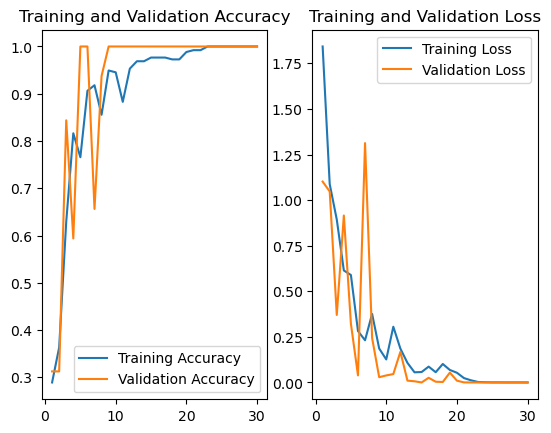

In [115]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [116]:
import streamlit as st

st.write("Evaluasi Model pada Test Set")
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.1921e-07
Test Loss: 1.1920925402364446e-07
Test Accuracy: 1.0


Found 300 files belonging to 3 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step


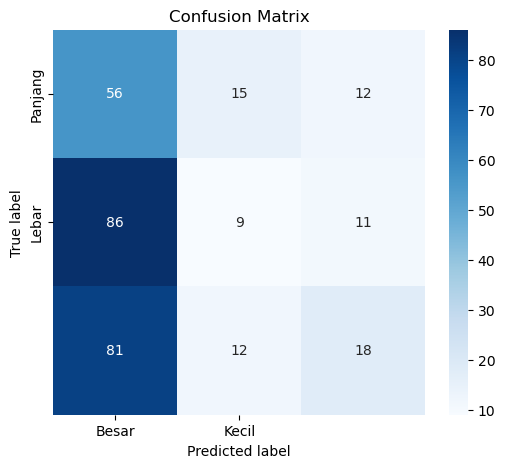

Confusion Matrix:
 [[56 15 12]
 [86  9 11]
 [81 12 18]]
Akurasi: 0.27666666666666667
Presisi: [0.25112108 0.25       0.43902439]
Recall: [0.6746988  0.08490566 0.16216216]
F1 Score: [0.36601307 0.12676056 0.23684211]


In [117]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Load model
model = load_model(r'D:\ATMAJAYA\Semester5\PMDPL\UAS_A_11648\BestModel_VGG-16_Transformers.h5')

# Load test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224)  # Ubah ukuran ke 224x224 agar sesuai dengan input model VGG-16
)

# Normalisasi data jika model mengharuskan input dalam rentang [0, 1]
test_data = test_data.map(lambda x, y: (x / 255.0, y))

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

# Ekstrak label sebenarnya dari test_data
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

# Membuat confusion matrix
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# Menghitung akurasi, presisi, recall, dan F1 score
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Besar", "Kecil"], yticklabels=["Panjang", "Lebar"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())


In [118]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Memuat model yang sudah dilatih
model = load_model(r'D:\ATMAJAYA\Semester5\PMDPL\UAS_A_11648\BestModel_VGG-16_Transformers.h5')  # Ganti dengan path model Anda
class_names = ['Busuk','Matang', 'Mentah']  # Kelas yang ada pada model

# Fungsi untuk mengklasifikasikan gambar dan menyimpan gambar asli
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Memuat dan mempersiapkan gambar untuk prediksi dengan ukuran yang sesuai
        input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))  # Ubah ukuran gambar sesuai dengan model
        input_image_array = tf.keras.utils.img_to_array(input_image)  # Mengubah gambar jadi array numpy agar bisa di proses model
        input_image_array = tf.keras.applications.vgg16.preprocess_input(input_image_array)  # Preprocessing gambar

        # Menambahkan dimensi batch agar sesuai dengan input model
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Dimensi menjadi (1, 224, 224, 3)

        # Melakukan prediksi
        predictions = model.predict(input_image_exp_dim)  # Melakukan prediksi pada gambar yang telah diproses

        # Cek bentuk predictions
        print(f"Predictions shape: {predictions.shape}")
        
        # Pastikan predictions memiliki hasil yang benar
        if predictions.shape[0] == 0:
            return "Terjadi kesalahan: Tidak ada hasil prediksi."
        
        result = tf.nn.softmax(predictions[0])  # Menghitung hasil prediksi
        class_idx = np.argmax(result)  # Menemukan indeks kelas
        confidence = np.max(result) * 100  # Menghitung confidence dalam persentase

        # Menampilkan hasil prediksi dan confidence
        print(f"Prediksi: {class_names[class_idx]}")  # Menampilkan nama kelas yang diprediksi
        print(f"Confidence: {confidence:.2f}%")  # Menampilkan nilai confidence

        # Menyimpan gambar asli tanpa teks
        input_image = Image.open(image_path)  # Membuka gambar yang ada di path
        input_image.save(save_path)  # Menyimpan gambar asli ke dalam path yang telah ditentukan

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

# Contoh penggunaan fungsi
result = classify_images(r'D:\ATMAJAYA\Semester5\PMDPL\UAS_A_11648\test_data\Matang\6.jpg', save_path='matang.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Predictions shape: (1, 3)
Prediksi: Mentah
Confidence: 41.43%
Prediksi: Mentah dengan confidence 41.43%. Gambar asli disimpan di matang.jpg.


In [119]:
model.save('BestModel_VGG-16_Transformers.h5')